# Linear Regression

## Notation

$x$ - Input values.\
$x_i$ - ith input value.\
$y$ - Correct output values.\
$\hat{y}$ - Prediction values.\
$y_i$ - ith output value.\
$m$ - Size of training set (i.e. dataset with correct outputs).\
$w, b$ - Model parameters.\
$\alpha$ - Learning rate.

## Formulas

### Model Prediction
$f_{w, b}(x) = wx + b$

### Cost Function

$J(w, b) = \frac{1}{2m} \sum_{i = 1}^{m} (f_{w, b}(x) - y_i)^2$

### Gradient Descent

Repeat the until convergence:

$w = w - \alpha \frac{\partial}{\partial w} = w - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{w, b}(x_i) - y_i)x_i]$\
$b = b - \alpha \frac{\partial}{\partial b} = b - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{w, b}(x_i) - y_i)]$

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## Creating Random Dataset

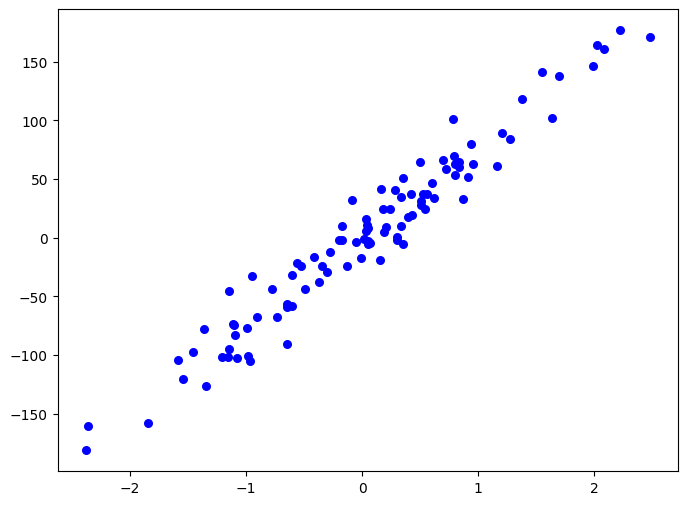

(80, 1)
(80,)


In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

print(X_train.shape)
print(y_train.shape)

In [4]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        """
        Args:
            lr (float, optional): Learning rate. Defaults to 0.001.
            n_iters (int, optional): Number of iterations Defaults to 1000.
        """
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize parameters.
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Apply gradient descent.
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Derivatives
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Updates
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [5]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

305.77413162286416


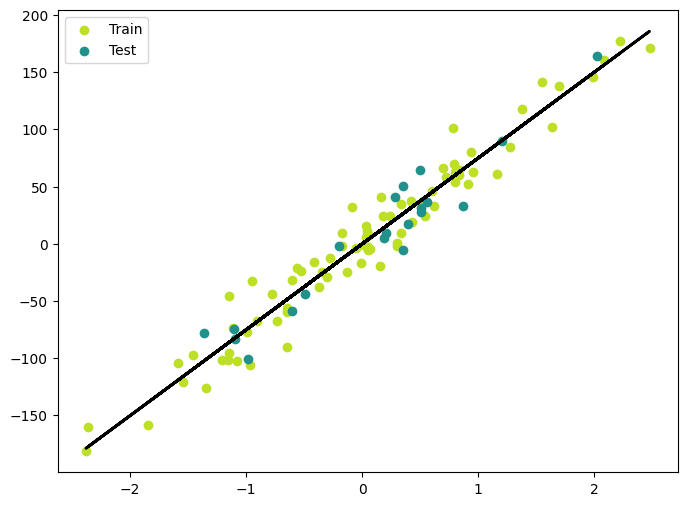

In [14]:
regressor = LinearRegression(lr=0.1)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
mse_value = mse(y_test, predicted)
print(mse_value)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), label="Train")
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), label="Test")
plt.legend()
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()